# Visualizing the survey results with seaborn

We are finally ready to visualize the survey results with `matplotlib` and `seaborn`! Arguably the ability to make plots interactively and inline is one of the biggest advantages to using jupyter notbooks.

In [4]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import pandas

responses = pandas.read_csv('data/tidied.csv')
responses.head()

,person,question,response_n,response
0,p0,At what kind of facilities would you like to s...,0,Libraries
1,p0,At what kind of facilities would you like to s...,1,Offices
2,p1,At what kind of facilities would you like to s...,0,Libraries
3,p1,At what kind of facilities would you like to s...,1,Bars
4,p1,At what kind of facilities would you like to s...,2,Offices


## Start with a really bad plot

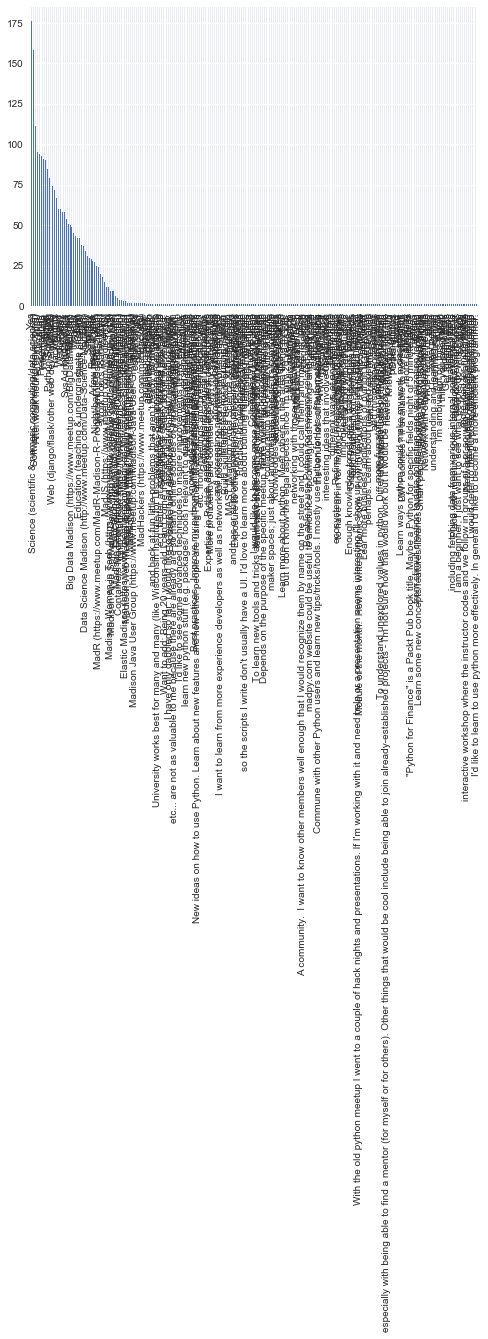

In [5]:
responses.response.value_counts().plot.bar()  # blarg!

## Merge in question information

In [6]:
import json
questions = pandas.read_csv('data/questions.csv')
questions['choices'] = questions.choices_json.apply(lambda x: json.loads(x))
del questions['choices_json']
questions.head()

,qid,question,choices
0,q0,Email address *,[]
1,q1,How are you using Python?,"[Software (engineering/developing), Science (s..."
2,q2,What kind(s) of events would you like to see a...,"[Software (engineering/developing), Science (s..."
3,q3,What format(s) of events would you like to see...,"[Presentations, Hack Nights, Python Schooling,..."
4,q4,At what skill level would you like to see even...,"[Introductory, Intermediate, Expert]"


In [7]:
survey = pandas.merge(responses, questions, how='left')
survey.set_index('qid', inplace=True)
survey.head()

,person,question,response_n,response,choices
qid,,,,,
q9,p0,At what kind of facilities would you like to s...,0,Libraries,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p0,At what kind of facilities would you like to s...,1,Offices,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,0,Libraries,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,1,Bars,"[Libraries, Bars, Restaurants, Offices, Other:]"
q9,p1,At what kind of facilities would you like to s...,2,Offices,"[Libraries, Bars, Restaurants, Offices, Other:]"


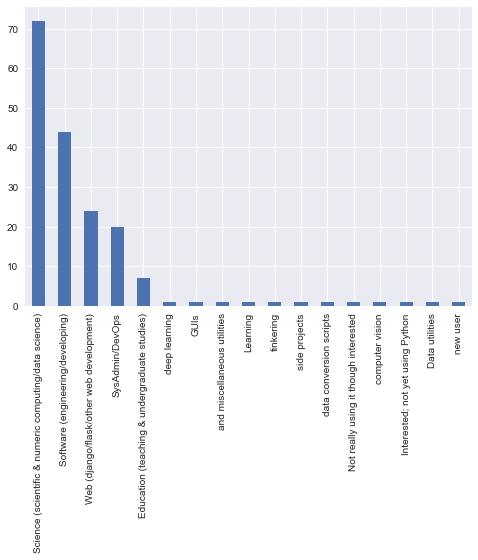

In [8]:
survey.ix['q1', 'response'].value_counts().plot.bar()

## Determine response type

Label each response either as itself if it was in the choices or as "Other".

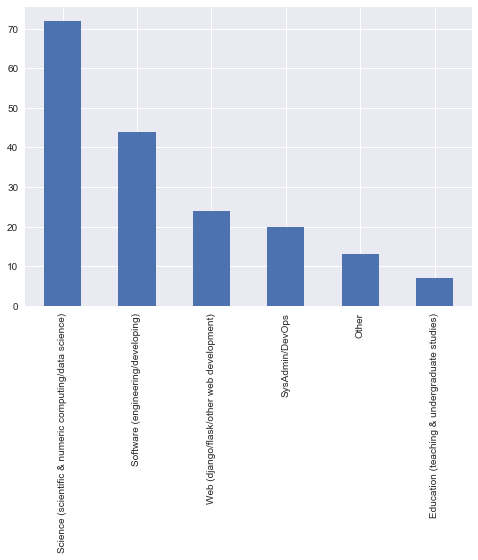

In [9]:
def label_response_type(data):
    return data.response if data.response in data.choices else 'Other'

survey['response_type'] = survey.apply(label_response_type, axis=1)
survey.ix['q1', 'response_type'].value_counts().plot.bar()

## Create response labels

Split each choice at the first open parenthesis to create shorter, response labels.

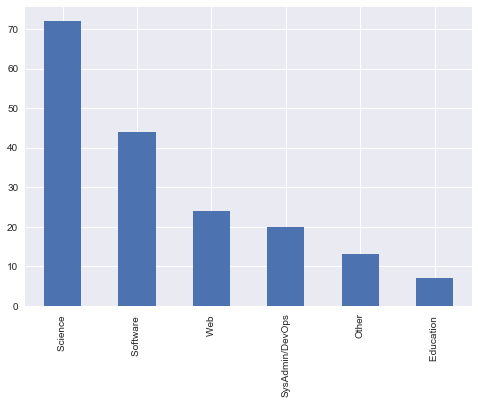

In [10]:
survey['response_label'] = survey.response_type.str.split('(').str.get(0)
survey.ix['q1', 'response_label'].value_counts().plot.bar()

# Madpy survey results

In [8]:
def countplot(qid):
    """Create pretty histograms of survey responses to a particular question."""
    ax = plt.axes()
    question_text = questions.loc[questions.qid == qid, 'question'].item()
    ax.set_title(question_text)
    seaborn.countplot(survey.ix[qid, 'response_label'], ax=ax)
    ax.figure.autofmt_xdate()

## What are Madison pythonistas interested in?

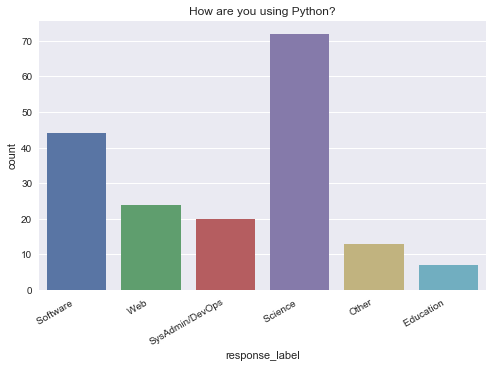

In [9]:
countplot('q1')

[What I learned from Stack Overflow’s massive survey of 64,000 developers](https://medium.freecodecamp.com/73-of-programmers-are-web-developers-and-other-insights-from-stack-overflows-massive-2017-survey-89a13b11e370)

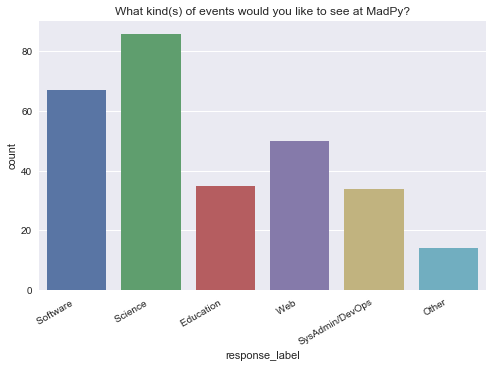

In [10]:
countplot('q2')

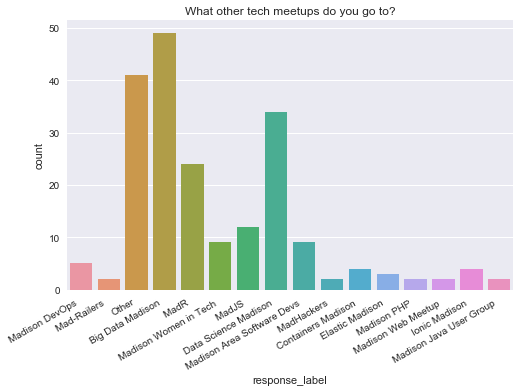

In [18]:
countplot('q10')

# How should we organize the meetings?

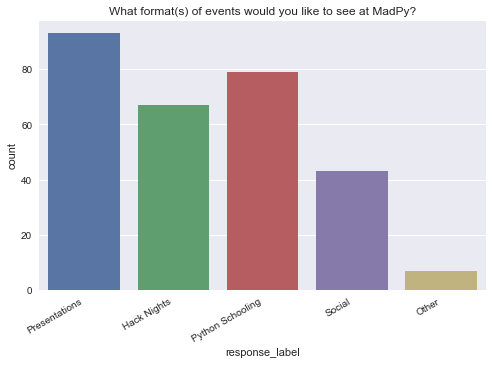

In [11]:
countplot('q3')

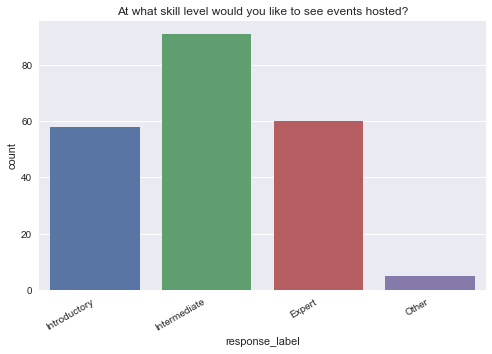

In [12]:
countplot('q4')

## Keeping in touch with the group

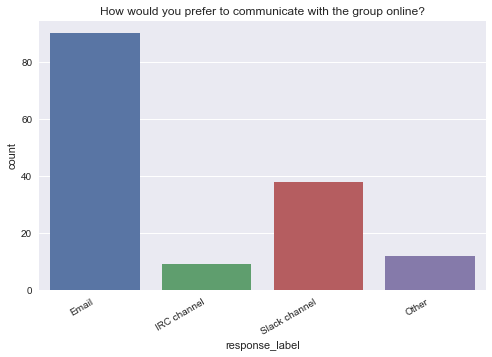

In [19]:
countplot('q11')

### Madpy is on Slack!

Why do you need more notifications in your life?
1. Continuing conversations.
2. Asking for help.
3. Giving away knowledge.

## When2Meet

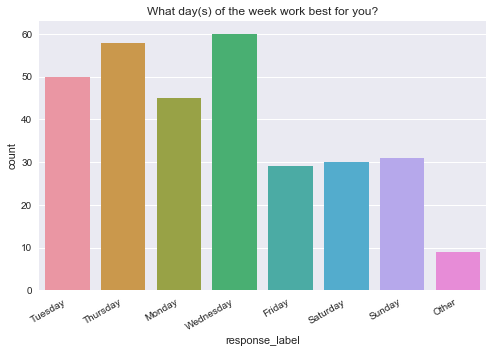

In [13]:
countplot('q5')

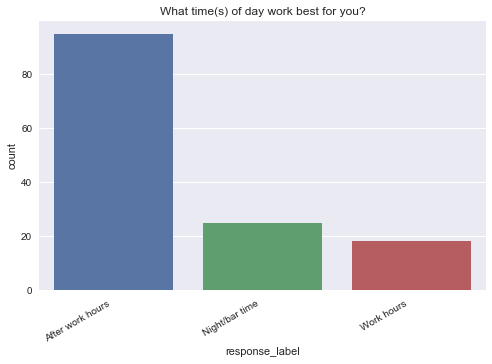

In [14]:
countplot('q6')

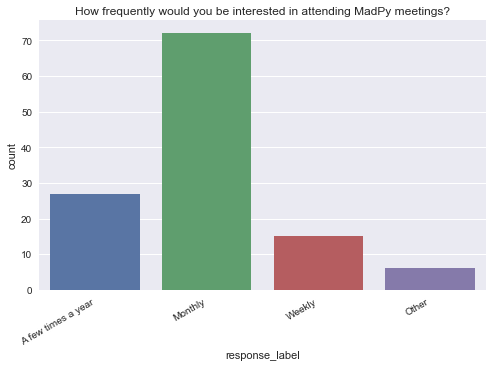

In [15]:
countplot('q7')

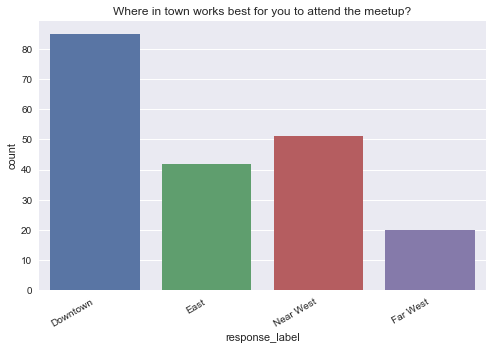

In [16]:
countplot('q8')

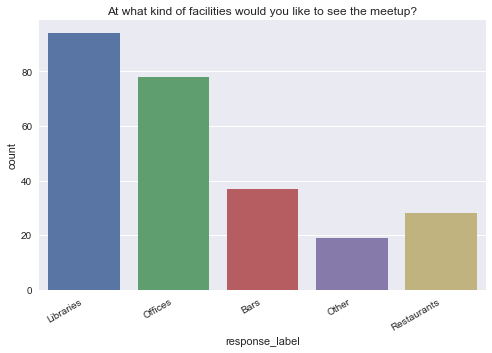

In [17]:
countplot('q9')

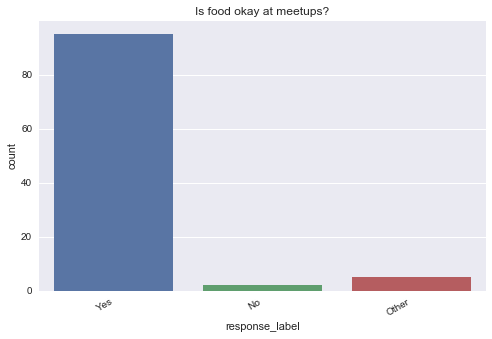

In [20]:
countplot('q12')

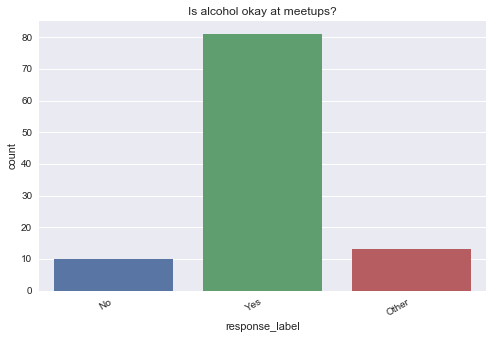

In [21]:
countplot('q13')